Name : Dwi Fitria Astari Lubis

Prodigy_DS_03

Task 3
Build a decision tree classifier to predict whether a customer will purchase a product or service 
based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset 
from the UCI Machine Learning Repository.

Sample Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing
citation:[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

Undertanding the database
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [51]:
#Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [52]:
#Load the dataset
url = 'bank-additional-full.csv'
df = pd.read_csv(url,delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

data contains 41187 observation of 20 features, where are 11 categorical featuresand 9 numeric features

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)


In [55]:
df.shape

(41188, 21)

In [56]:
#Check duplicate
df.duplicated().sum()

np.int64(12)

In [57]:
#Duplicate deletion #keeplast
data_no_duplicates = df.drop_duplicates(keep='last')

In [58]:
data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [59]:
data_no_duplicates.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


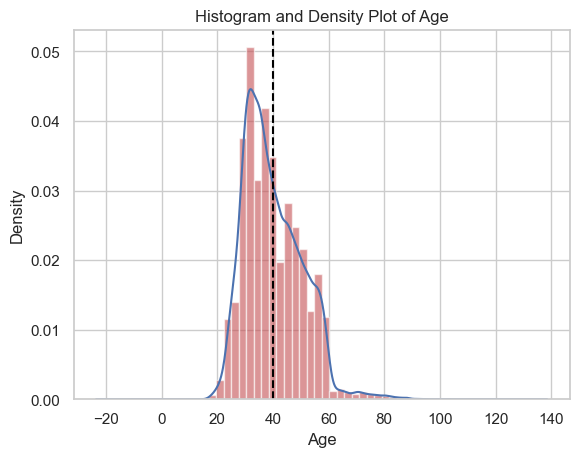

In [60]:
#Histogram density of age
plt.hist(data_no_duplicates['age'], bins=30, density=True, alpha=0.6, color='r')

# Density plot
data_no_duplicates['age'].plot(kind='kde')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram and Density Plot of Age')
# Add a vertical line at the mean age (optional)
mean_age = data_no_duplicates['age'].mean()
plt.axvline(x=mean_age, color='black', linestyle='--')

plt.show()

Age range between 15 and 95 years. Mean is in 40 years.

age                  Axes(0.125,0.653529;0.110714x0.226471)
duration          Axes(0.257857,0.653529;0.110714x0.226471)
campaign          Axes(0.390714,0.653529;0.110714x0.226471)
pdays             Axes(0.523571,0.653529;0.110714x0.226471)
previous          Axes(0.656429,0.653529;0.110714x0.226471)
emp.var.rate      Axes(0.789286,0.653529;0.110714x0.226471)
cons.price.idx       Axes(0.125,0.381765;0.110714x0.226471)
cons.conf.idx     Axes(0.257857,0.381765;0.110714x0.226471)
euribor3m         Axes(0.390714,0.381765;0.110714x0.226471)
nr.employed       Axes(0.523571,0.381765;0.110714x0.226471)
dtype: object

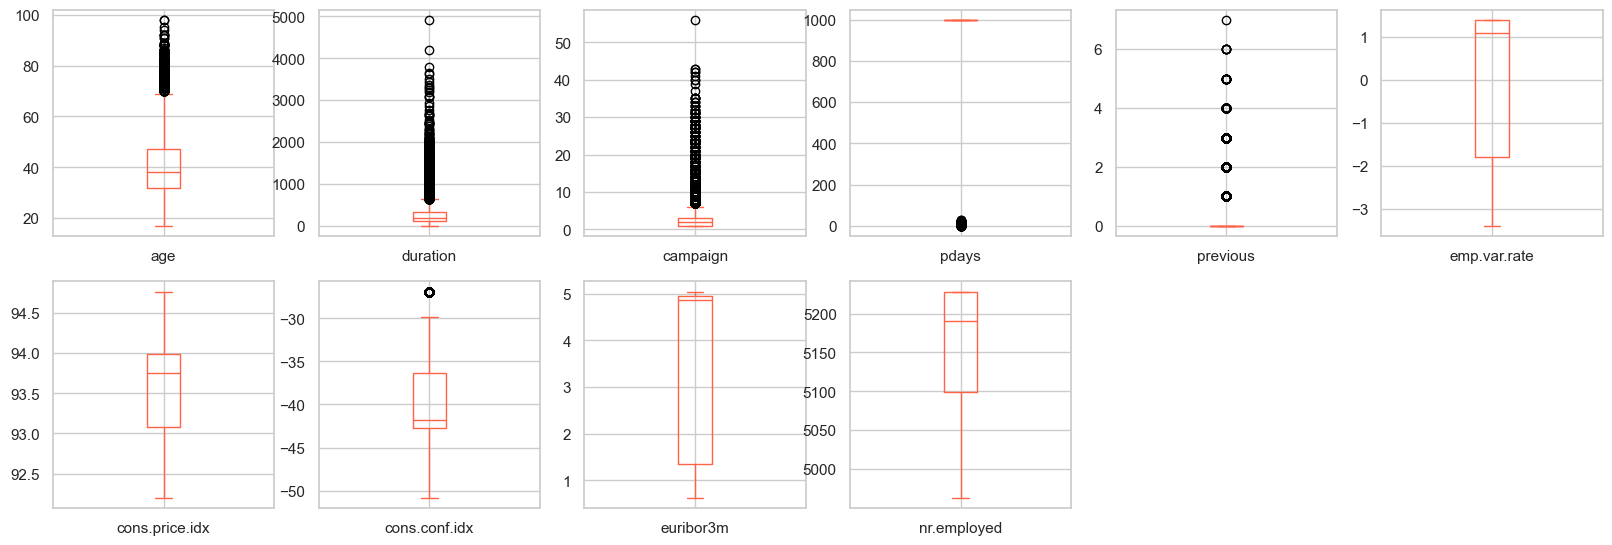

In [61]:
data_no_duplicates.plot(kind='box', subplots=True, layout=(3,6),figsize=(20,10),color='#FF6347')

1. Age: The age distribution shows a wide range with some outliers, indicating a diverse age group among the individuals.
2. Duration: The duration of the campaign calls has a significant number of outliers, suggesting that while most calls are of a certain length, there are some exceptionally long calls.
3. Campaign: The number of contacts performed during this campaign varies, with a few individuals being contacted many times.
4. Economic Indicators: Features like emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed show different levels of variability, which can provide insights into the economic conditions during the campaign.

In [62]:
# Assuming data_no_duplicates is your DataFrame
df_after_outliers = data_no_duplicates.copy()

# Columns to check for outliers
columns = ['age', 'campaign', 'duration']

# Calculate IQR for each column and filter out outliers
for column in columns:
    if df_after_outliers[column].dropna().empty:
        continue
    q1 = np.percentile(df_after_outliers[column].dropna(), 25)
    q3 = np.percentile(df_after_outliers[column].dropna(), 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_after_outliers = df_after_outliers[(df_after_outliers[column] >= lower_bound) & (df_after_outliers[column] <= upper_bound)]

# Display the DataFrame after removing outliers
print(df_after_outliers)


       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41181   37       admin.  married    university.degree       no     yes   no   
41182   29   unemployed   single             basic.4y       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  

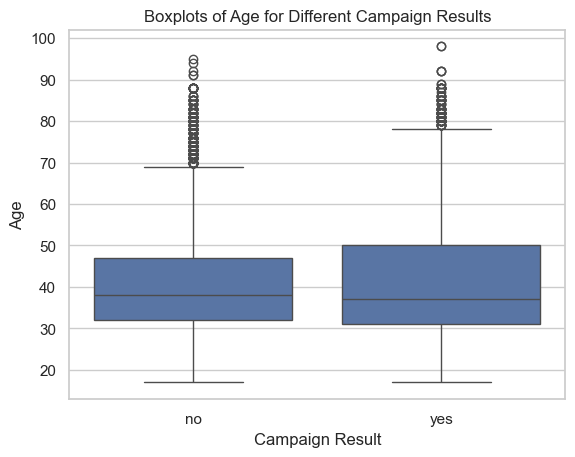

In [63]:
# Set seaborn style (optional)
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='deposit', y='age', data=df)

# Customize the plot (optional)
plt.title('Boxplots of Age for Different Campaign Results')
plt.xlabel('Campaign Result')
plt.ylabel('Age')

plt.show()

The overall age distribution for the “yes” result is more concentrated, while the “no” result shows a broader age range

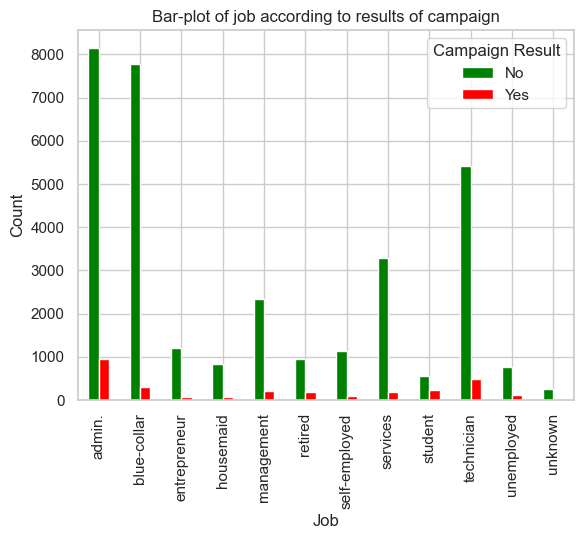

In [64]:
# Group by job and campaign result
job_campaign = df_after_outliers.groupby(['job', 'deposit']).size().unstack(fill_value=0)

# Plot the bar chart
job_campaign.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Bar-plot of job according to results of campaign')
plt.legend(title='Campaign Result', labels=['No', 'Yes'])
plt.show()


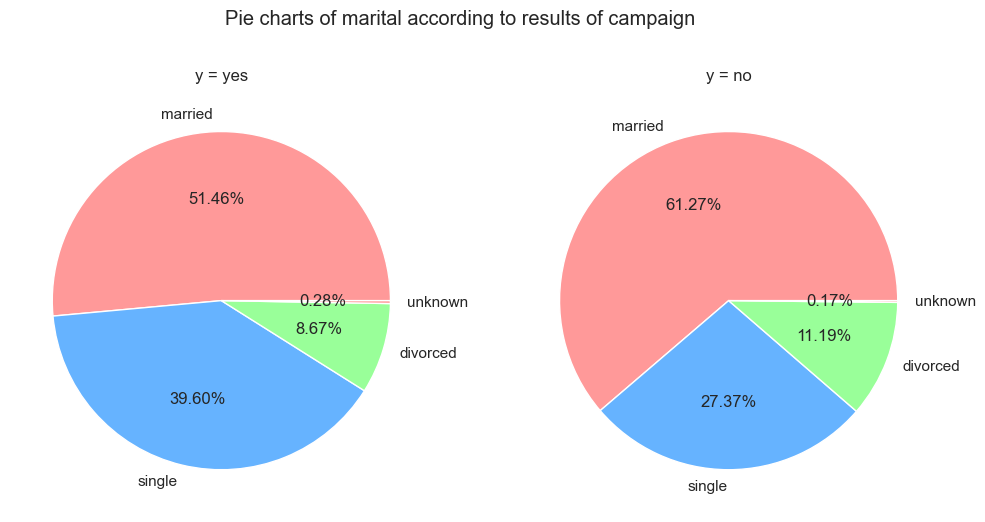

In [65]:
# Filter data based on campaign result
yes_data = df_after_outliers[df_after_outliers['deposit'] == 'yes']
no_data = df_after_outliers[df_after_outliers['deposit'] == 'no']

# Calculate the percentage of each marital status
yes_marital = yes_data['marital'].value_counts(normalize=True) * 100
no_marital = no_data['marital'].value_counts(normalize=True) * 100

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'yes' marital
axs[0].pie(yes_marital, labels=yes_marital.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('y = yes')

# Pie chart for 'no' marital
axs[1].pie(no_marital, labels=no_marital.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[1].set_title('y = no')

# Add a title to the figure
plt.suptitle('Pie charts of marital according to results of campaign')
plt.show()


Married individuals have the highest subscription rate for a term deposit at 54.56%, as well as the highest unsubscribed rate at 61.28%. Singles have the second highest subscription rate at 34.92% and the second highest unsubscribed rate at 27.22%. These percentages reflect the outcomes of various campaign results for different groups. Married individuals have the highest subscription and unsubscribed rates for term deposits, followed by singles, while divorced individuals have the lowest subscription and unsubscribed rates.

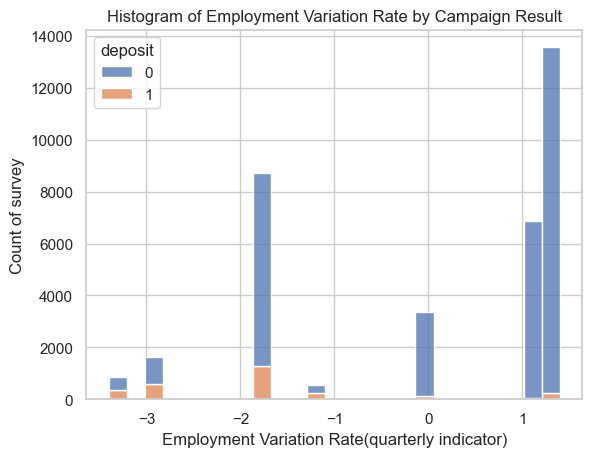

In [116]:
sns.histplot(data=df_after_outliers, x='emp.var.rate', hue='deposit', multiple='stack')
plt.xlabel('Employment Variation Rate(quarterly indicator)')
plt.ylabel('Count of survey')
plt.title('Histogram of Employment Variation Rate by Campaign Result')
plt.show()


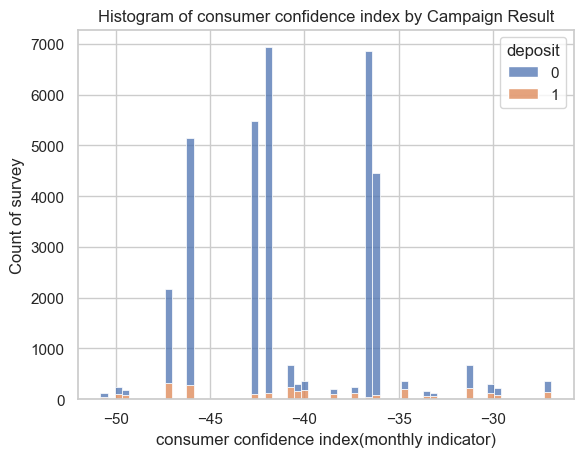

In [119]:
sns.histplot(data=df_after_outliers, x='cons.conf.idx', hue='deposit', multiple='stack')
plt.xlabel('consumer confidence index(monthly indicator)')
plt.ylabel('Count of survey')
plt.title('Histogram of consumer confidence index by Campaign Result')
plt.show()

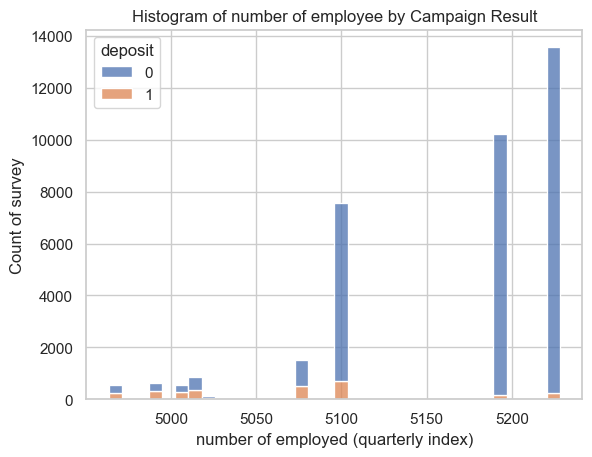

In [118]:
sns.histplot(data=df_after_outliers, x='nr.employed', hue='deposit', multiple='stack')
plt.xlabel('number of employed (quarterly index)')
plt.ylabel('Count of survey')
plt.title('Histogram of number of employee by Campaign Result')
plt.show()

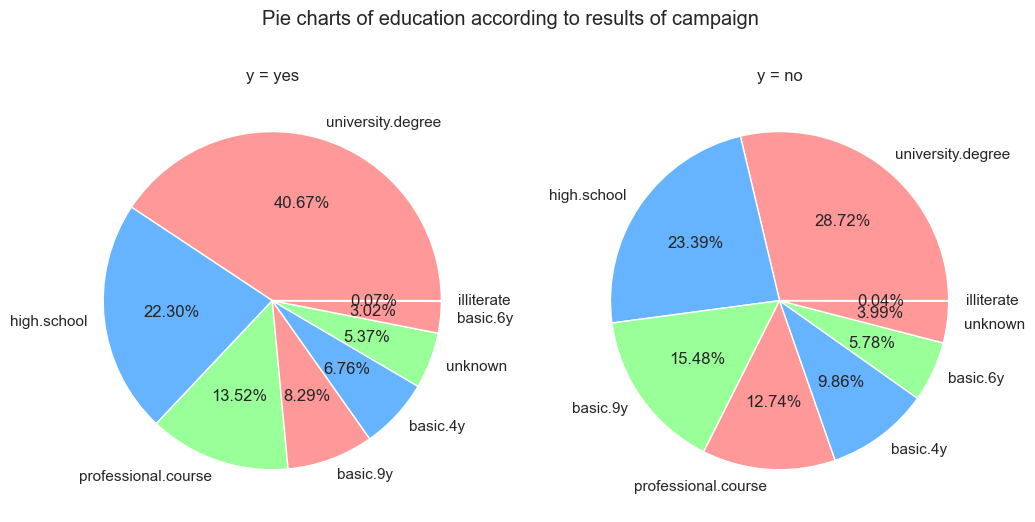

In [68]:
# Filter data based on campaign result
yes_data = df_after_outliers[df_after_outliers['deposit'] == 'yes']
no_data = df_after_outliers[df_after_outliers['deposit'] == 'no']

# Calculate the percentage of each education status
yes_education = yes_data['education'].value_counts(normalize=True) * 100
no_education = no_data['education'].value_counts(normalize=True) * 100

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'yes' education
axs[0].pie(yes_education, labels=yes_education.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('y = yes')

# Pie chart for 'no' education
axs[1].pie(no_education, labels=no_education.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[1].set_title('y = no')

# Add a title to the figure
plt.suptitle('Pie charts of education according to results of campaign')
plt.show()

we see that university degree has the highest percentage of subscribed and unsubscribed , with 35.98% subscribed and 28.72% unsubscribed. Followed by high school with a 22,22% subscribed and 23,21% unsubscribed, then illiterate and the unknown which has the least number of subscribed and unsubscribed.

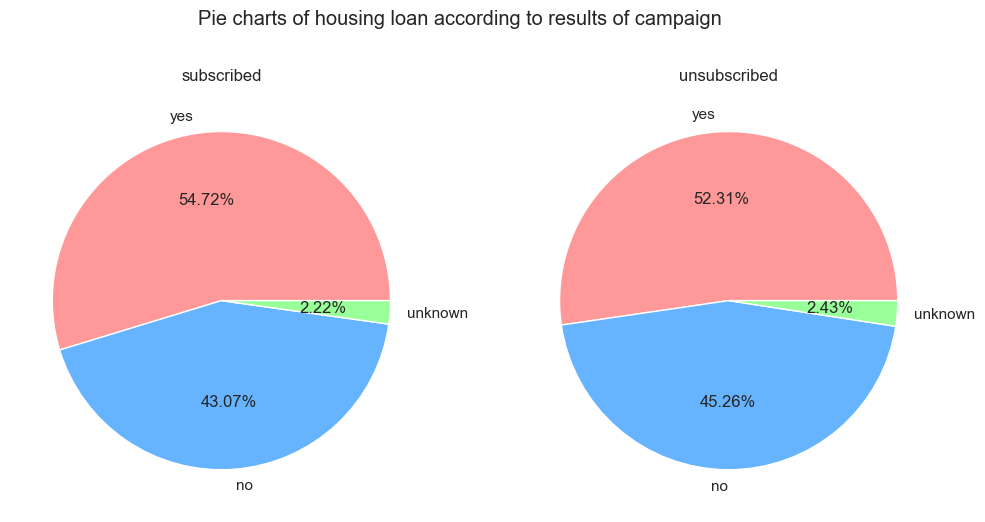

In [69]:
# Filter data based on campaign result
yes_data = df_after_outliers[df_after_outliers['deposit'] == 'yes']
no_data = df_after_outliers[df_after_outliers['deposit'] == 'no']

# Calculate the percentage of each housing loan status
yes_housing = yes_data['housing'].value_counts(normalize=True) * 100
no_housing = no_data['housing'].value_counts(normalize=True) * 100

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'yes' housing loan
axs[0].pie(yes_housing, labels=yes_housing.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('subscribed')

# Pie chart for 'no' housing loan
axs[1].pie(no_housing, labels=no_housing.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[1].set_title('unsubscribed')

# Add a title to the figure
plt.suptitle('Pie charts of housing loan according to results of campaign')
plt.show()

We observe that having a house loan has the highest percentage of subscriptions and unsubscriptions, with 54.72% subscribed and 52.31% unsubscribed. This is followed by not having a house loan, with 43.07% subscribed and 45.26% unsubscribed. The "unknown" category has the lowest number of subscriptions and unsubscriptions.

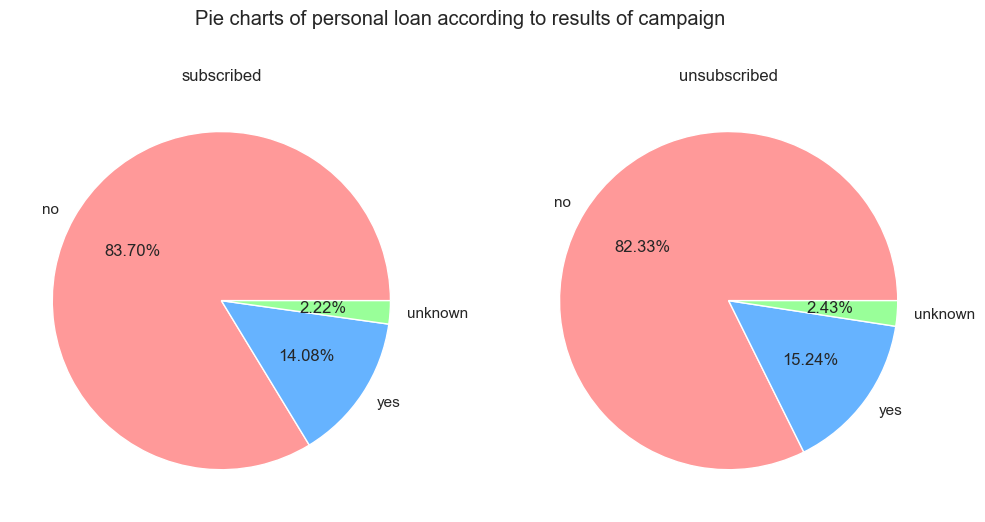

In [70]:
# Filter data based on campaign result
yes_data = df_after_outliers[df_after_outliers['deposit'] == 'yes']
no_data = df_after_outliers[df_after_outliers['deposit'] == 'no']

# Calculate the percentage of each personal loan status
yes_loan = yes_data['loan'].value_counts(normalize=True) * 100
no_loan = no_data['loan'].value_counts(normalize=True) * 100

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'yes' personal loan
axs[0].pie(yes_loan, labels=yes_loan.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('subscribed')

# Pie chart for 'yes' personal loan
axs[1].pie(no_loan, labels=no_loan.index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[1].set_title('unsubscribed')

# Add a title to the figure
plt.suptitle('Pie charts of personal loan according to results of campaign')
plt.show()

We observe that no-having personal loan has the highest percentage of subscriptions and unsubscriptions, with 83.70% subscribed and 82.33% unsubscribed. This is followed having personal loan, with 14.08% subscribed and 15.24% unsubscribed. The "unknown" category has the lowest number of subscriptions and unsubscriptions.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df_after_outliers.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_after_outliers[column] = label_encoders[column].fit_transform(df_after_outliers[column])

                     age       job   marital  education   default   housing  \
age             1.000000 -0.015593 -0.392536  -0.102009  0.189119 -0.005663   
job            -0.015593  1.000000  0.031643   0.139899 -0.032104  0.006737   
marital        -0.392536  0.031643  1.000000   0.106835 -0.083515  0.012421   
education      -0.102009  0.139899  0.106835   1.000000 -0.193392  0.013827   
default         0.189119 -0.032104 -0.083515  -0.193392  1.000000 -0.013355   
housing        -0.005663  0.006737  0.012421   0.013827 -0.013355  1.000000   
loan           -0.006742 -0.012212  0.005029   0.003908  0.000962  0.042687   
contact         0.033645 -0.022889 -0.064529  -0.111157  0.132181 -0.081917   
month          -0.029744 -0.032711 -0.008860  -0.083307 -0.020544 -0.020748   
day_of_week    -0.024146  0.000276  0.004084  -0.019337 -0.006563  0.002180   
duration        0.002561 -0.008790  0.008870  -0.018549 -0.015062 -0.012331   
campaign        0.011994 -0.009733 -0.011807  -0.002

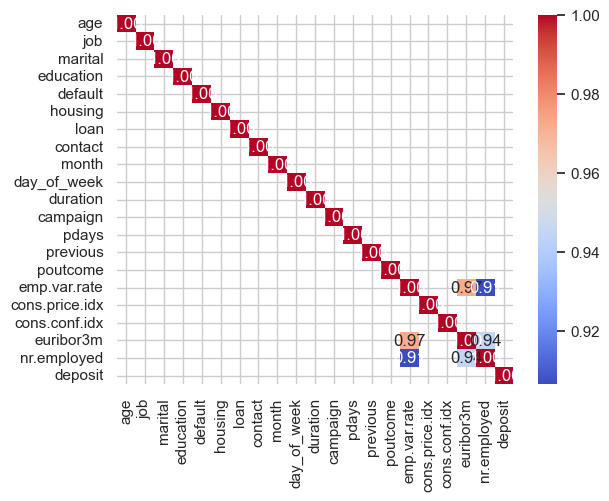

In [72]:
# Compute the correlation matrix
corr = df_after_outliers.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

- age and pdays have a strong positive correlation, suggesting that older customers tend to have longer periods since their last contact.
- cons.price.idx and nr.employed show a strong positive correlation, indicating that consumer price index is closely tied to the number of employees.
- Customer Segmentation: The correlations between job types and other variables might suggest potential customer segments based on occupation.
- Marketing Campaigns: The seasonal patterns indicated by month-related variables can inform the timing of marketing campaigns.
- Predictive Modeling: Strong correlations can be used as features in predictive models, such as predicting customer churn or purchase behavior.

In [73]:
df_after_outliers.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [74]:
# Separate features (X) and target variable (y)
X = df_after_outliers.drop("deposit", axis=1)  # "deposit" is the target variable (purchase)
y = df_after_outliers["deposit"]


In [75]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [92]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["job", "marital", "education", "default", "housing", "loan","contact", "month", "day_of_week","poutcome","deposit"]
le = LabelEncoder()
for col in categorical_columns:
    df_after_outliers[col] = le.fit_transform(df_after_outliers[col])


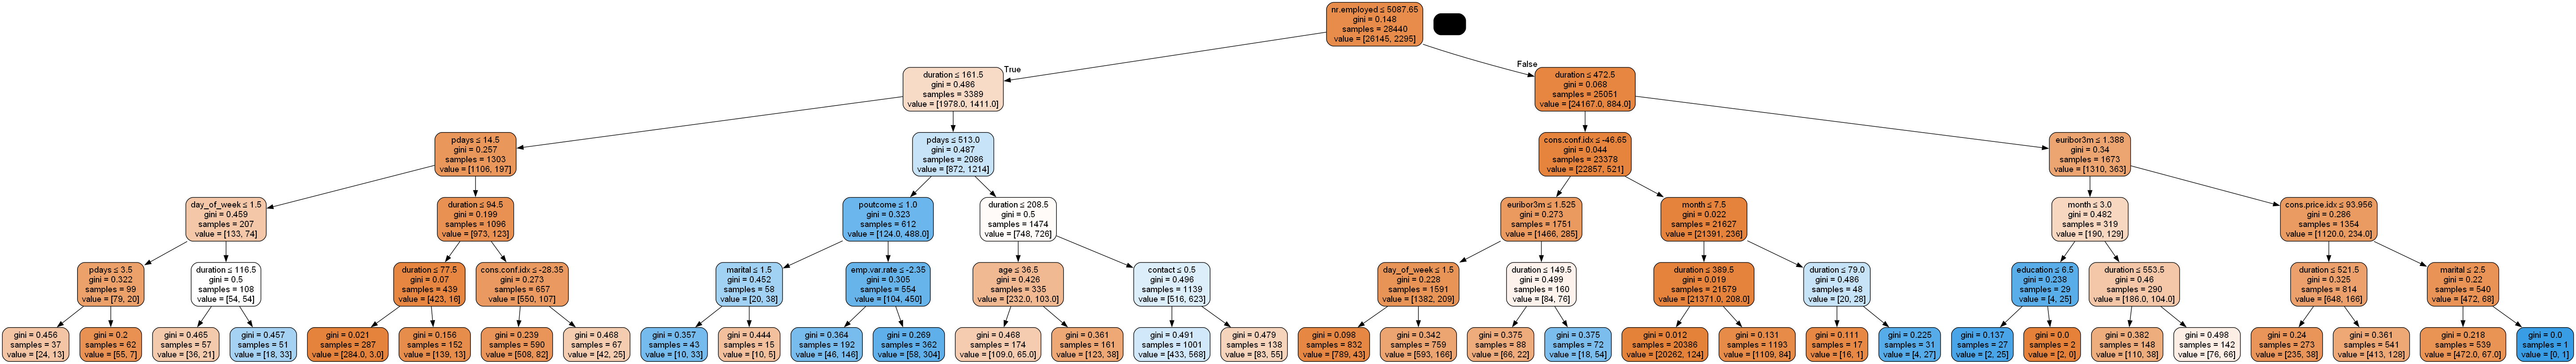

In [103]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
model = DecisionTreeClassifier(max_depth=5)  # adjust max_depth for complexity
model.fit(X_train, y_train)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import pydotplus
from IPython.display import Image

# Export the decision tree to DOT format
dot_data = export_graphviz(model, out_file=None, filled=True, feature_names=X.columns, rounded=True, special_characters=True)

# Convert the DOT file to a graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())

Variable which will affect people will subscribe: 
1. Nr.employed: The number of employees.
2. Duration: The duration of the last contact.
3. Pdays: The number of days since the client was last contacted from a previous campaign.
4. Previous: The number of contacts performed before this campaign.
5. Euribor3m: The Euribor 3-month rate.
6. Demografic profile will subscribe: single, adult age (more than 36), education (primary, secondary, tertiary school and illiterate)


In [104]:
# Make predictions
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[6376  145]
 [ 290  299]]


6465: True Negatives (TN) - The model correctly predicted 6465 negative cases.
103: False Positives (FP) - The model incorrectly predicted 103 positive cases.
318: False Negatives (FN) - The model incorrectly predicted 318 negative cases.
224: True Positives (TP) - The model correctly predicted 224 positive cases.

In [106]:
# Model Evaluation (using accuracy here)
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      6521
           1       0.67      0.51      0.58       589

    accuracy                           0.94      7110
   macro avg       0.81      0.74      0.77      7110
weighted avg       0.93      0.94      0.93      7110



class 0 represent customers who did not subscribe to the service or product.
class 1 represent customers who did subscribe to the service or product

The model performs very well for class ‘0’ with high precision (0.95), recall (0.98), and F1-score (0.97). This indicates that the model is very accurate in predicting the negative class. Meanwhile, the performance for class ‘1’ is lower, with precision at 0.67, recall at 0.51, and F1-score at 0.58. This suggests that the model struggles more with predicting the positive class.

The model has an overall accuracy of 0.94, meaning it correctly predicts 94% of the instances.

Macro Average: Precision (0.81), recall (0.74), and F1-score (0.77) indicate the average performance across both classes without considering class imbalance.
Weighted Average: Precision (0.93), recall (0.94), and F1-score (0.93) take into account the support (number of instances) for each class, showing a high overall performance.

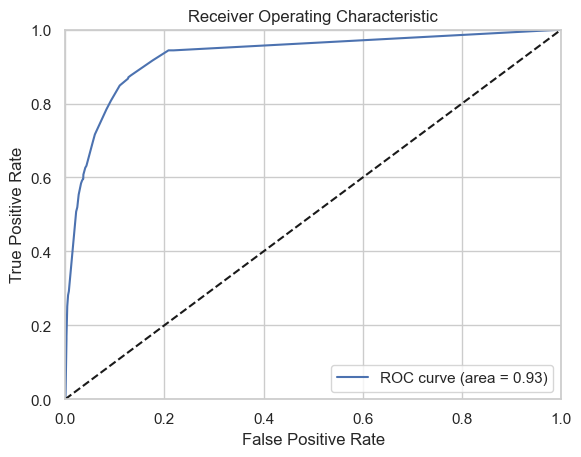

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


the model is 93% effective at distinguishing between customers who will subscribe and those who won’t.